In [3]:
import numpy as np

In [4]:
def initialize(layer_dims):
    np.random.seed(3)
    parameters = {}
    L = len(layer_dims)
    #layer_dims的三项分别是nx，xh，xy
    for i in range(1,L):
        parameters["W"+str(i)] = np.random.randn(layer_dims[i],layer_dims[i-1])*0.01 # W1的维度是nh * nx
        parameters["b"+str(i)] = np.zeros((layer_dims[i],1)) # b1的维度是nh * 1
    return parameters

In [5]:
parameters = initialize([5, 4, 3])
print("W1 = " + str(parameters["W1"]))
print("b1 = " + str(parameters["b1"]))
print("W2 = " + str(parameters["W2"]))
print("b2 = " + str(parameters["b2"]))

W1 = [[ 0.01788628  0.0043651   0.00096497 -0.01863493 -0.00277388]
 [-0.00354759 -0.00082741 -0.00627001 -0.00043818 -0.00477218]
 [-0.01313865  0.00884622  0.00881318  0.01709573  0.00050034]
 [-0.00404677 -0.0054536  -0.01546477  0.00982367 -0.01101068]]
b1 = [[0.]
 [0.]
 [0.]
 [0.]]
W2 = [[-0.01185047 -0.0020565   0.01486148  0.00236716]
 [-0.01023785 -0.00712993  0.00625245 -0.00160513]
 [-0.00768836 -0.00230031  0.00745056  0.01976111]]
b2 = [[0.]
 [0.]
 [0.]]


In [6]:
def linear_forward(A,W,b):
    Z = np.dot(W,A)+b
    linear_cache = (A,W,b)
    return Z,linear_cache

In [7]:
np.random.seed(1)
A = np.random.randn(3,2)
W = np.random.randn(1,3)
b = np.random.randn(1,1)
Z, linear_cache = linear_forward(A, W, b)
print("Z = " + str(Z))
print(linear_cache)

Z = [[ 3.26295337 -1.23429987]]
(array([[ 1.62434536, -0.61175641],
       [-0.52817175, -1.07296862],
       [ 0.86540763, -2.3015387 ]]), array([[ 1.74481176, -0.7612069 ,  0.3190391 ]]), array([[-0.24937038]]))


In [8]:
#激活函数sigmoid
def sigmoid(Z):
    A = 1/(1+np.exp(-Z))
    activation_cache = Z
    return A,activation_cache
#relu
def relu(Z):
    A = np.maximum(0,Z)
    activation_cache = Z
    return A,activation_cache

In [9]:
def linear_activation_forward(A_prev, W, b, activation):
    # Sigmoid activation function
    if activation == "sigmoid":
        Z, linear_cache = linear_forward(A_prev, W, b)
        A, activation_cache = sigmoid(Z)

    # ReLU activation function
    elif activation == "relu":
        Z, linear_cache = linear_forward(A_prev, W, b)
        A, activation_cache = relu(Z)

    assert(A.shape == (W.shape[0], A_prev.shape[1]))
    cache = (linear_cache, activation_cache)

    return A, cache

In [10]:
np.random.seed(2)
A_prev = np.random.randn(3,2)
W = np.random.randn(1,3)
b = np.random.randn(1,1)

A, cache = linear_activation_forward(A_prev, W, b, "sigmoid")
print("With sigmoid: A = " + str(A))

A, cache = linear_activation_forward(A_prev, W, b, "relu")
print("With ReLU: A = " + str(A))

With sigmoid: A = [[0.96890023 0.11013289]]
With ReLU: A = [[3.43896131 0.        ]]


In [11]:
def forward(X, parameters):
    caches = []
    A = X
    L = len(parameters) // 2            # number of layers in the neural network

    # Implement [LINEAR->RELU]*(L-1)
    for l in range(1, L):
        A_prev = A
        A, cache = linear_activation_forward(A_prev, parameters["W" + str(l)], parameters["b" + str(l)], "relu")
        caches.append(cache)

    AL, cache = linear_activation_forward(A, parameters["W" + str(L)], parameters["b" + str(L)], "sigmoid")
    caches.append(cache)

    assert(AL.shape == (1, X.shape[1]))

    return AL, caches

In [12]:
np.random.seed(6)
X = np.random.randn(5,4)
W1 = np.random.randn(4,5)
b1 = np.random.randn(4,1)
W2 = np.random.randn(3,4)
b2 = np.random.randn(3,1)
W3 = np.random.randn(1,3)
b3 = np.random.randn(1,1)
parameters = {"W1": W1, "b1": b1, "W2": W2, "b2": b2, "W3": W3, "b3": b3}
AL, caches = forward(X, parameters)
print("AL = " + str(AL))
print("Length of caches list = " + str(len(caches)))

AL = [[0.03921668 0.70498921 0.19734387 0.04728177]]
Length of caches list = 3


In [13]:
def compute_cost(AL, Y):
    m = Y.shape[1]
    cost = np.sum(np.multiply(Y, np.log(AL)) + np.multiply(1 - Y, np.log(1 - AL))) / (- m)
    cost = np.squeeze(cost)
    
    return cost

In [14]:
Y = np.asarray([[1, 1, 1]])
AL = np.array([[.8, .9, 0.4]])
print("cost = " + str(compute_cost(AL,Y)))

cost = 0.414931599615397


In [27]:
def linear_backward(dZ, linear_cache):
    A_prev, W, b = linear_cache
    m = A_prev.shape[1]

    dW = np.dot(dZ, A_prev.T) / m
    db = np.sum(dZ, axis = 1, keepdims = True) / m
    dA_prev = np.dot(W.T, dZ)

    assert(dA_prev.shape == A_prev.shape)
    assert(dW.shape == W.shape)
    assert(db.shape == b.shape)

    return dA_prev, dW, db

In [32]:
np.random.seed(1)
dZ = np.random.randn(1, 2)
A = np.random.randn(3, 2)
W = np.random.randn(1, 3)
b = np.random.randn(1, 1)
linear_cache = (A, W, b)
dA_prev, dW, db = linear_backward(dZ, linear_cache)
print("dA_prev = " + str(dA_prev))
print("dW = " + str(dW))
print("db = " + str(db))

dA_prev = [[ 0.51822968 -0.19517421]
 [-0.40506361  0.15255393]
 [ 2.37496825 -0.89445391]]
dW = [[-0.10076895  1.40685096  1.64992505]]
db = [[0.50629448]]


In [33]:
def sigmoid_backward(dA, activation_cache):
    Z = activation_cache
    s = 1 / (1 + np.exp(-Z))
    dZ = dA * s * (1 - s)

    assert(dZ.shape == Z.shape)

    return dZ
def relu_backward(dA, activation_cache):
    Z = activation_cache
    dZ = np.array(dA, copy = True)          # just converting dZ to a correct object
    dZ[Z <=0] = 0                           # When Z <=0, set dZ to 0

    assert(dZ.shape == Z.shape)

    return dZ

In [34]:
def linear_activation_backward(dA, cache, activation):
    linear_cache, activation_cache = cache

    # Sigmoid activation function
    if activation == "sigmoid":
        dZ = sigmoid_backward(dA, activation_cache)
        dA_prev, dW, db = linear_backward(dZ, linear_cache)

    # ReLU activation function
    elif activation == "relu":
        dZ = relu_backward(dA, activation_cache)
        dA_prev, dW, db = linear_backward(dZ, linear_cache)

    return dA_prev, dW, db

In [35]:
np.random.seed(2)
dA = np.random.randn(1, 2)
A = np.random.randn(3, 2)
W = np.random.randn(1, 3)
b = np.random.randn(1, 1)
Z = np.random.randn(1, 2)
linear_cache = (A, W, b)
activation_cache = Z
cache = (linear_cache, activation_cache)

dA_prev, dW, db = linear_activation_backward(dA, cache, "sigmoid")
print("sigmoid:")
print("dA_prev = " + str(dA_prev))
print("dW = " + str(dW))
print("db = " + str(db) + "\n")

dA_prev, dW, db = linear_activation_backward(dA, cache, "relu")
print("relu:")
print("dA_prev = " + str(dA_prev))
print("dW = " + str(dW))
print("db = " + str(db))

sigmoid:
dA_prev = [[ 0.11017994  0.01105339]
 [ 0.09466817  0.00949723]
 [-0.05743092 -0.00576154]]
dW = [[ 0.10266786  0.09778551 -0.01968084]]
db = [[-0.05729622]]

relu:
dA_prev = [[ 0.44090989 -0.        ]
 [ 0.37883606 -0.        ]
 [-0.2298228   0.        ]]
dW = [[ 0.44513824  0.37371418 -0.10478989]]
db = [[-0.20837892]]


In [36]:
def backward(AL, Y, caches):
    grads = {}
    L = len(caches)        # the number of layers
    m = AL.shape[1]
    Y = Y.reshape(AL.shape)    # After this line, Y is the same as AL
    
    # Initializing the backpropagation
    dAL = -(np.divide(Y, AL) - np.divide(1 - Y, 1 - AL))        # derivative of cost with respect to AL

    # Layer of L-1, "sigmoid"
    current_cache = caches[L - 1]
    grads["dA" + str(L)], grads["dW" + str(L)], grads["db" + str(L)] = linear_activation_backward(dAL, current_cache, "sigmoid")
    
    # Layer of others, "relu"
    for l in reversed(range(L-1)):
        current_cache = caches[l]
        grads["dA" + str(l + 1)], grads["dW" + str(l + 1)], grads["db" + str(l + 1)] = linear_activation_backward(grads["dA" + str(l + 2)], current_cache, "relu")

    return grads

In [37]:
np.random.seed(3)
AL = np.random.randn(1, 2)
Y = np.array([[1, 0]])

A1 = np.random.randn(4, 2)
W1 = np.random.randn(3, 4)
b1 = np.random.randn(3, 1)
Z1 = np.random.randn(3, 2)
linear_cache_activation_1 = ((A1, W1, b1), Z1)

A2 = np.random.randn(3, 2)
W2 = np.random.randn(1, 3)
b2 = np.random.randn(1, 1)
Z2 = np.random.randn(1, 2)
linear_cache_activation_2 = ((A2, W2, b2), Z2)

caches = (linear_cache_activation_1, linear_cache_activation_2)

grads = backward(AL, Y, caches)
print ("dW1 = "+ str(grads["dW1"]))
print ("db1 = "+ str(grads["db1"]))
print ("dA2 = "+ str(grads["dA2"])) 

dW1 = [[0.41010002 0.07807203 0.13798444 0.10502167]
 [0.         0.         0.         0.        ]
 [0.05283652 0.01005865 0.01777766 0.0135308 ]]
db1 = [[-0.22007063]
 [ 0.        ]
 [-0.02835349]]
dA2 = [[ 0.12913162 -0.44014127]
 [-0.14175655  0.48317296]
 [ 0.01663708 -0.05670698]]


In [38]:
def update_parameters(parameters, grads, learning_rate):
    L = len(parameters) // 2
    
    for l in range (1, L + 1):
        parameters["W" + str(l)] = parameters["W" + str(l)] - learning_rate * grads["dW" + str(l)]
        parameters["b" + str(l)] = parameters["b" + str(l)] - learning_rate * grads["db" + str(l)]

    return parameters

In [39]:
np.random.seed(2)
W1 = np.random.randn(3, 4)
b1 = np.random.randn(3, 1)
W2 = np.random.randn(1, 3)
b2 = np.random.randn(1, 1)
parameters = {"W1": W1,
              "b1": b1,
              "W2": W2,
              "b2": b2}
np.random.seed(3)
dW1 = np.random.randn(3, 4)
db1 = np.random.randn(3, 1)
dW2 = np.random.randn(1, 3)
db2 = np.random.randn(1, 1)
grads = {"dW1": dW1,
         "db1": db1,
         "dW2": dW2,
         "db2": db2}

parameters = update_parameters(parameters, grads, 0.1)
print("W1 = " + str(parameters["W1"]))
print("b1 = " + str(parameters["b1"]))
print("W2 = " + str(parameters["W2"]))
print("b2 = " + str(parameters["b2"]))

W1 = [[-0.59562069 -0.09991781 -2.14584584  1.82662008]
 [-1.76569676 -0.80627147  0.51115557 -1.18258802]
 [-1.0535704  -0.86128581  0.68284052  2.20374577]]
b1 = [[-0.04659241]
 [-1.28888275]
 [ 0.53405496]]
W2 = [[-0.55569196  0.0354055   1.32964895]]
b2 = [[-0.84610769]]


In [40]:
def dnn_model(train_x, train_y, layers_dims, learning_rate = 0.0075, num_iterations = 3000, print_cost = False):
    np.random.seed(1)
    costs = []
    parameters = initialize(layers_dims)

    for i in range (0, num_iterations):
        AL, caches = forward(train_x, parameters)
        grads = backward(AL, train_y, caches)
        parameters = update_parameters(parameters, grads, learning_rate)
        cost = compute_cost(AL, train_y)

        # Print cost every 100 training example
        if print_cost and i % 100 == 0:
            print("Cost after iteration %i: %f" %(i, cost))
            costs.append(cost)

    if print_cost:
        plt.plot(np.squeeze(costs))
        plt.ylabel('cost')
        plt.xlabel('iterations (per tens)')
        plt.title("Learning rate = " + str(learning_rate))
    return parameters

In [41]:
def predict(X, Y, parameters):
    m = X.shape[1]
    probas, caches = forward(X, parameters)
    prediction = (probas > 0.5)
    accuracy = np.sum(prediction == Y) / m

    return prediction, accuracy

In [45]:
import h5py
import matplotlib.pyplot as plt

np.random.seed(1)

# Load original data
train_dataset = h5py.File('train_catvnoncat.h5', "r")
train_x_orig = np.array(train_dataset["train_set_x"][:])        # Train set features
train_y_orig = np.array(train_dataset["train_set_y"][:])        # Train set labels

test_dataset = h5py.File('test_catvnoncat.h5', "r")
test_x_orig = np.array(test_dataset["test_set_x"][:])           # Test set features
test_y_orig = np.array(test_dataset["test_set_y"][:])           # Test set labels
classes = np.array(test_dataset["list_classes"][:])  # the list of classes

m_train = train_x_orig.shape[0]
m_test = test_x_orig.shape[0]
num_px = train_x_orig.shape[1]

# Reshape original data
train_x = train_x_orig.reshape(m_train, -1).T / 255
train_y = train_y_orig.reshape(1, train_y_orig.shape[0])
test_x = test_x_orig.reshape(m_test, -1).T / 255
test_y = test_y_orig.reshape(1, test_y_orig.shape[0])

y = 1. It's a cat picture.
Number of training examples: 209
Number of testing examples: 50
Each image is of size: (64, 64, 3)
train_x_orig shape: (209, 64, 64, 3)
train_x shape: (12288, 209)
train_y shape: (1, 209)
test_x_orig shape: (50, 64, 64, 3)
test_x shape: (12288, 50)
test_y shape: (1, 50)


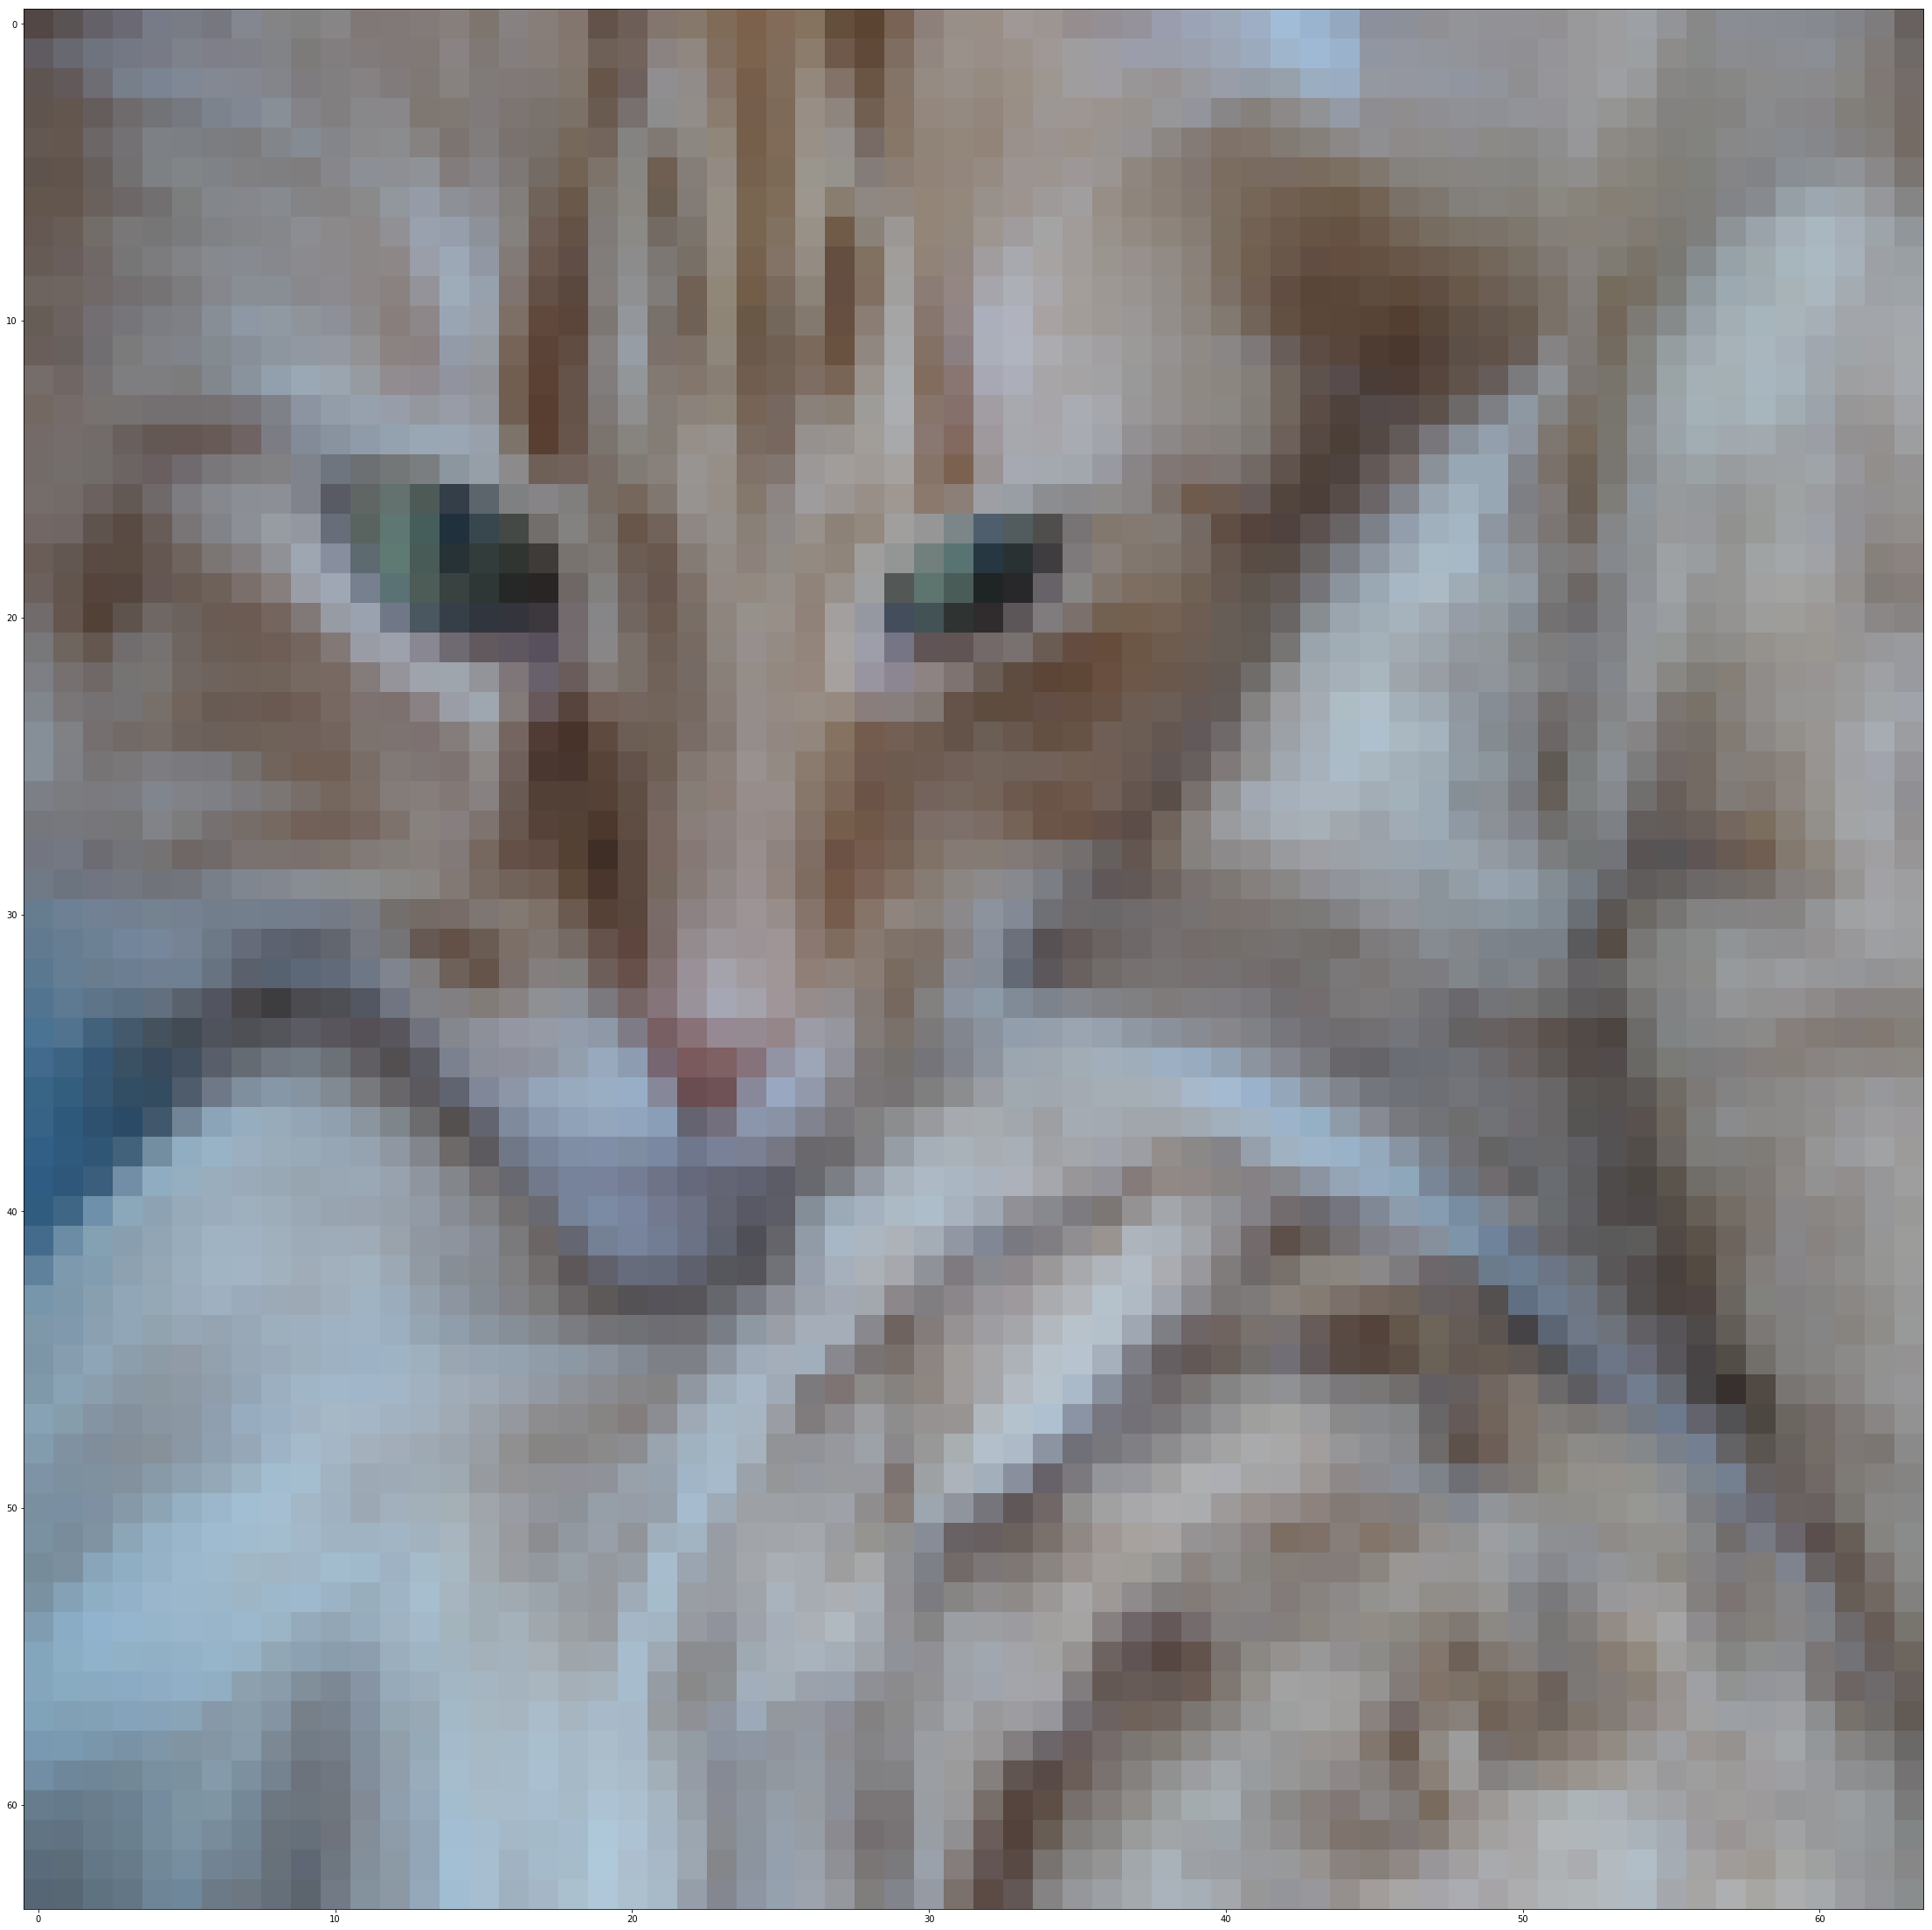

In [54]:
index = 2
plt.figure(1)
plt.imshow(train_x_orig[index])
print ("y = " + str(train_y[0,index]) + ". It's a " + classes[train_y[0,index]].decode("utf-8") +  " picture.")

# Information about train and test data
print ("Number of training examples: " + str(m_train))
print ("Number of testing examples: " + str(m_test))
print ("Each image is of size: (" + str(num_px) + ", " + str(num_px) + ", 3)")
print ("train_x_orig shape: " + str(train_x_orig.shape))
print ("train_x shape: " + str(train_x.shape))
print ("train_y shape: " + str(train_y.shape))
print ("test_x_orig shape: " + str(test_x_orig.shape))
print ("test_x shape: " + str(test_x.shape))
print ("test_y shape: " + str(test_y.shape))

Cost after iteration 0: 0.693148
Cost after iteration 100: 0.678011
Cost after iteration 200: 0.667600
Cost after iteration 300: 0.660422
Cost after iteration 400: 0.655458
Cost after iteration 500: 0.652013
Cost after iteration 600: 0.649616
Cost after iteration 700: 0.647942
Cost after iteration 800: 0.646770
Cost after iteration 900: 0.645947
Cost after iteration 1000: 0.645368
Cost after iteration 1100: 0.644961
Cost after iteration 1200: 0.644673
Cost after iteration 1300: 0.644469
Cost after iteration 1400: 0.644325
Cost after iteration 1500: 0.644223
Cost after iteration 1600: 0.644151
Cost after iteration 1700: 0.644100
Cost after iteration 1800: 0.644063
Cost after iteration 1900: 0.644037
Cost after iteration 2000: 0.644019
Cost after iteration 2100: 0.644006
Cost after iteration 2200: 0.643997
Cost after iteration 2300: 0.643990
Cost after iteration 2400: 0.643985
Train Accuracy = 0.6555023923444976
Test Accuracy = 0.34


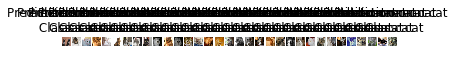

In [47]:
# DNN Model
layer_dims = [12288, 20, 7, 5, 1] #五层神经网络
parameters = dnn_model(train_x, train_y, layer_dims, num_iterations = 2500, print_cost = True)

# Predict Accuracy
train_prediction, train_accuracy = predict(train_x, train_y, parameters)
test_prediction, test_accuracy = predict(test_x, test_y, parameters)
print("Train Accuracy = " + str(train_accuracy))
print("Test Accuracy = " + str(test_accuracy))

# Mislabeled_images
test_actual = test_prediction + test_y
mislabeled_indices = np.asarray(np.where(test_actual == 1))
plt.rcParams['figure.figsize'] = (40.0, 40.0)       # set default size of plots
num_images = len(mislabeled_indices[0])
for i in range(num_images):
    index = mislabeled_indices[1][i]
    plt.subplot(2, num_images, i + 1)
    plt.imshow(test_x[:, index].reshape(64, 64, 3), interpolation='nearest')
    plt.axis('off')
    plt.title("Prediction: " + classes[int(test_prediction[0, index])].decode("utf-8") + " \n Class: " + classes[test_y[0, index]].decode("utf-8"))

plt.show()